In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import os
from math import * 
os.getcwd()
print("The current directory is: ")
print(os.getcwd())
path_parent = os.path.dirname(os.getcwd())
os.chdir(path_parent)
print("Moving up to the parent directory")
print(os.getcwd())

The current directory is: 
c:\Users\springnuance\Desktop\Abaqus-Macromechanics-Project\notebooks
Moving up to the parent directory
c:\Users\springnuance\Desktop\Abaqus-Macromechanics-Project


In [8]:
from stage0_configs import *
from modules.SOO_SIM import *
from modules.helper import *
from modules.hardeningLaws import *
info = main_config()


Welcome to the Abaqus parameter calibration project


The configurations you have chosen: 

+------------------------+-------------+
|     Global Configs     | User choice |
+------------------------+-------------+
| Number of initial sims |     100     |
|  Initial sims spacing  |     1000    |
|   Optimize strategy    |     SOO     |
|        Material        | DP1000_room |
|     Hardening law      |  SwiftVoce  |
|        Geometry        |    NDBR50   |
|      Curve index       |      2      |
|     Optimizer name     |      BO     |
|   Deviation percent    |      5      |
+------------------------+-------------+

Generating necessary directories

The path to your main project folder is

c:\Users\springnuance\Desktop\Abaqus-Macromechanics-Project



[{'c1': 0.3123123123123123, 'c2': 1305.3053053053054, 'c3': 0.06296296296296297, 'c4': 0.6126126126126126, 'c5': 390.39039039039045, 'c6': 725.7257257257257, 'c7': 346.34634634634637}, {'c1': 0.3863863863863864, 'c2': 1027.027027027027, 'c3': 0.011611611611611613, 'c4': 0.23223223223223222, 'c5': 160.16016016016016, 'c6': 926.926926926927, 'c7': 342.34234234234236}, {'c1': 0.6426426426426426, 'c2': 1103.1031031031032, 'c3': 0.0058058058058058064, 'c4': 0.16616616616616617, 'c5': 1729.7297297297298, 'c6': 329.32932932932937, 'c7': 472.47247247247253}, {'c1': 0.43243243243243246, 'c2': 1553.5535535535537, 'c3': 0.056056056056056056, 'c4': 0.4934934934934935, 'c5': 1201.2012012012012, 'c6': 394.39439439439445, 'c7': 202.20220220220222}, {'c1': 0.1881881881881882, 'c2': 1183.1831831831832, 'c3': 0.03333333333333333, 'c4': 0.4264264264264264, 'c5': 306.30630630630634, 'c6': 272.2722722722723, 'c7': 61.06106106106107}, {'c1': 0.06506506506506507, 'c2': 1245.2452452452453, 'c3': 0.04924924924

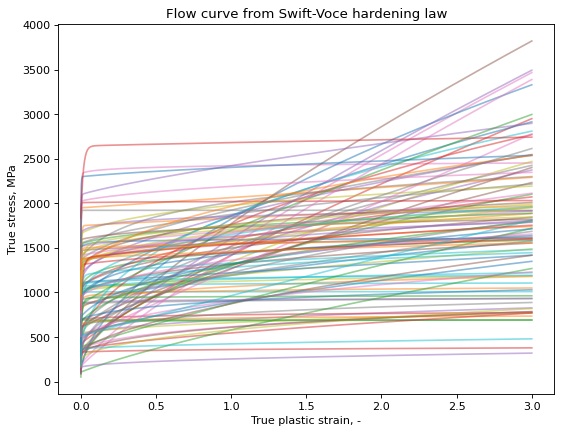

In [33]:
sim = SOO_SIM(info)
paramsDict = sim.latin_hypercube_sampling()
print(paramsDict)
truePlasticStrain = info['truePlasticStrain']
# Plot the flow curve
figure(figsize=(8, 6), dpi=80)
plt.title("Flow curve from Swift-Voce hardening law")
plt.xlabel("True plastic strain, -")
plt.ylabel("True stress, MPa")
for param in paramsDict:
    trueStress = SwiftVoce(param["c1"], param["c2"], param["c3"], param["c4"], param["c5"], param["c6"], param["c7"], truePlasticStrain)
    plt.plot(truePlasticStrain, trueStress, alpha=0.5)

np.save("parameters.npy", paramsDict)